# Predicting Delays Based on Flight Data

### Import Statements

In [14]:
# make sure to use the same kernel as the one you use for class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

### Import Data

In [15]:
data = pd.read_csv('Airlines.csv')

print(data.head()) #check if data imported correctly

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0


## Summary Statistics

In [16]:
# Proportion of Flights by Day: Nada
days = ["Monday", "Tuesday", "Wedndesday", "Thursday", "Friday", "Saturday", "Sunday"]
for x in range(0, 7):
    flights_by_day = (data['DayOfWeek'].value_counts()[x + 1]) / len(data)
    print(f'Proportion of flights on {days[x]}: {flights_by_day}')
print('\n')

#Proportion of delays/ total : Mong
prop_delays = data[data['Delay'] == 1].shape[0] / data.shape[0]
print('Proportion of Delays/Total:', prop_delays)

#Proportion of delays/ total : Mong
prop_delays = data[data['Delay'] == 1].shape[0] / data.shape[0]
print('Proportion of Delays/Total:', prop_delays)


#Proportion of delays per airline: Nada
airline_names = [
    "Southwest",
    "Delta",
    "SkyWest",
    "American",
    "Envoy",
    "US Airways",
    "JetSuite",
    "ExpressJet",
    "United",
    "Continental",
    "AirTran",
    "Endeavor",
    "JetBlue",
    "Mesa",
    "PSA",
    "Alaska"]
airline_abv = ['WN', 'DL', 'OO', 'AA', 'MQ', 'US', 'XE', 'EV', 'UA', 'CO', 'FL', '9E', 'B6', 'YV', 'OH', 'AS']

for x in range(0,16):
    delay_by_airline = len(data[(data['Airline'] == airline_abv[x]) & (data['Delay'] == 1)]) / len(data)
    print(f'Proportion of delays on {airline_names[x]}: {delay_by_airline}')
    
# Proportion of delayed flights per departure airport (AirportFrom) : Joelia
departure_delay = data.groupby('AirportFrom')['Delay'].mean()
print("Proportions of Delays/Departure Airport:\n", departure_delay)

Proportion of flights on Monday: 0.13491155635235075
Proportion of flights on Tuesday: 0.13226223295876954
Proportion of flights on Wedndesday: 0.16638640817378375
Proportion of flights on Thursday: 0.16953630351716684
Proportion of flights on Friday: 0.15804725028412092
Proportion of flights on Saturday: 0.10930266619452227
Proportion of flights on Sunday: 0.12955358251928592


Proportion of Delays/Total: 0.4454422923970537
Proportion of delays on Southwest: 0.12172612040053171
Proportion of delays on Delta: 0.0508951895035624
Proportion of delays on SkyWest: 0.04219636139811599
Proportion of delays on American: 0.03288201519143169
Proportion of delays on Envoy: 0.02362328809028093
Proportion of delays on US Airways: 0.02148936840797726
Proportion of delays on JetSuite: 0.021867578325605368
Proportion of delays on ExpressJet: 0.02086643442600156
Proportion of delays on United: 0.016585617270103062
Proportion of delays on Continental: 0.02216792149548651
Proportion of delays on AirTran

# Plots / Figures

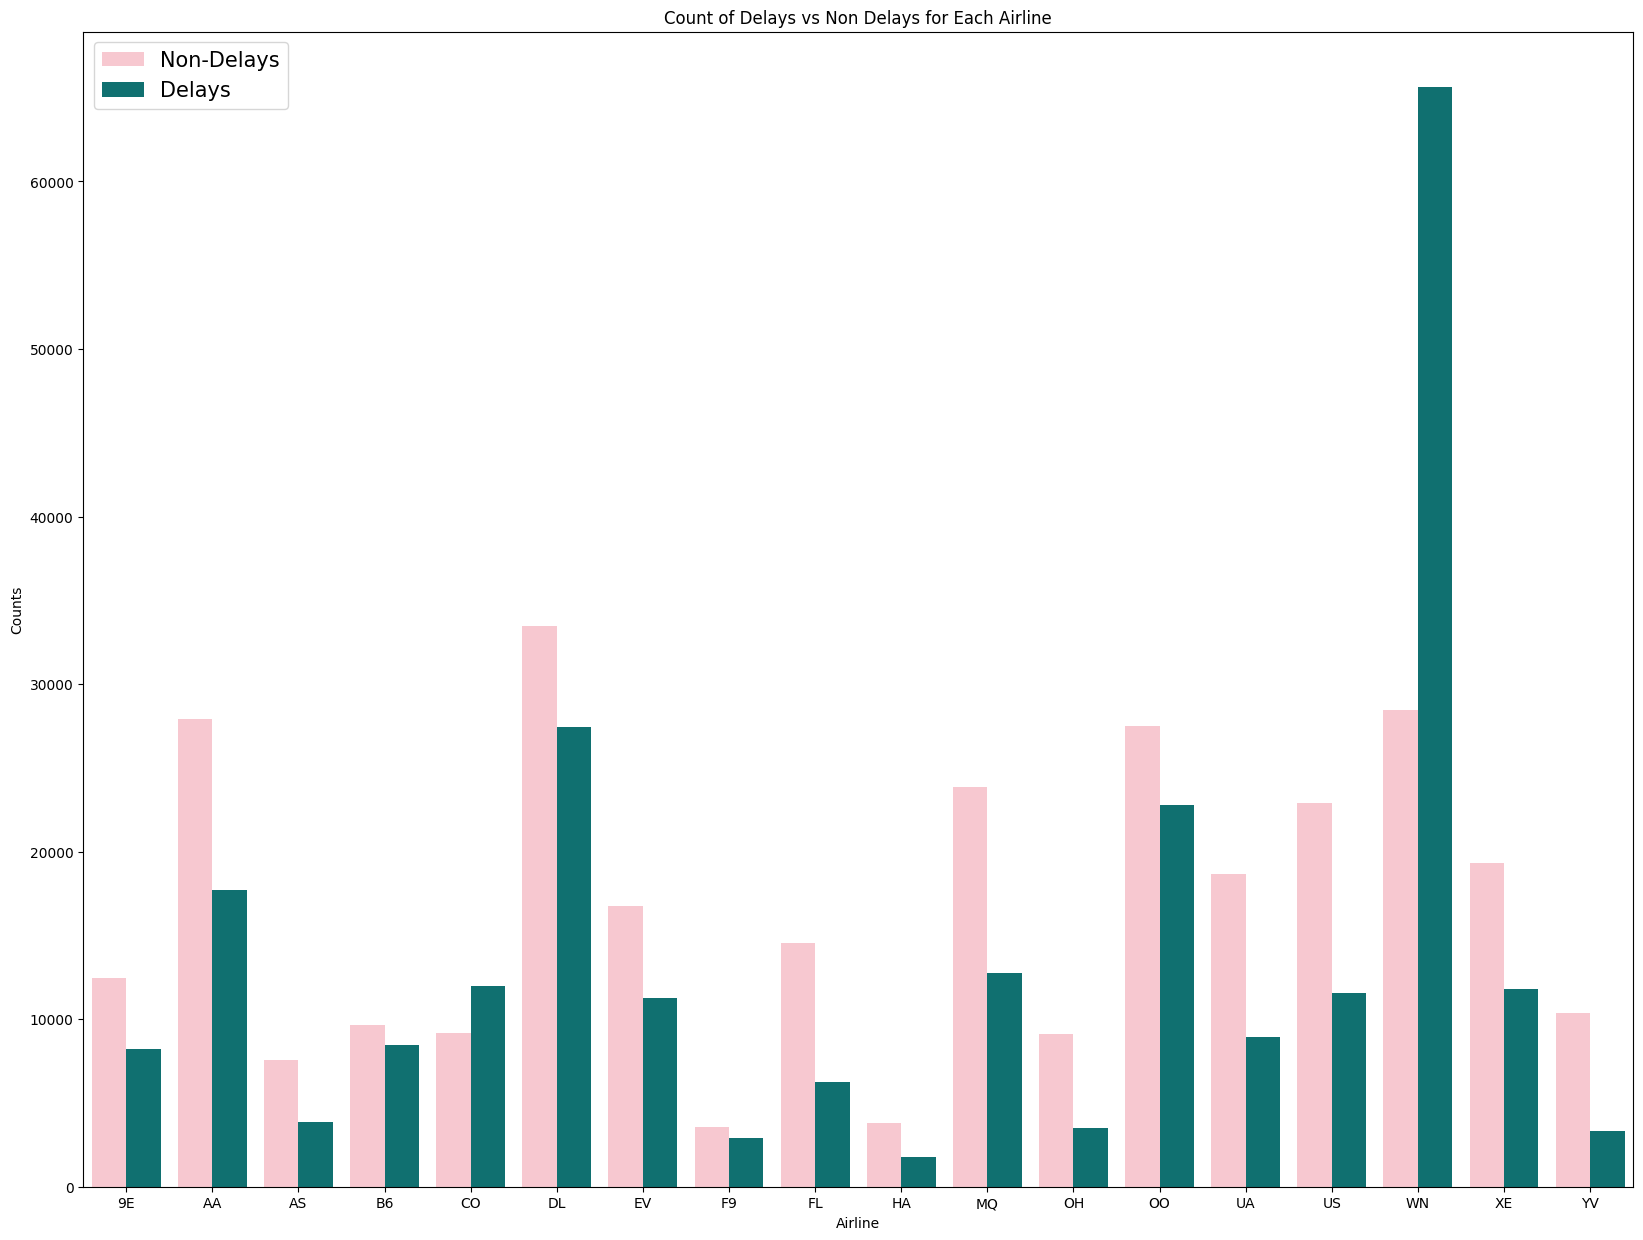

In [17]:
#Histogram of Delays vs Non Delays for each Airline : Mong

delay_counts = data.groupby(['Airline', 'Delay']).size().reset_index(name='Delays')

plt.figure(figsize=(20, 15))
sns.barplot(x='Airline', y='Delays', hue='Delay', data=delay_counts, palette = {0: 'pink', 1: 'teal'})
plt.title("Count of Delays vs Non Delays for Each Airline")
plt.xlabel("Airline")
plt.ylabel("Counts")
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=["Non-Delays", "Delays"],loc='upper left', fontsize=15)
plt.show()

In [18]:
# Filters the data to show only the delayed flights: Joelia 
df = pd.DataFrame(data)
delayed_data = df[df['Delay'] == 1]

# Stores max number of delays for each feature in dictionary  
max_delays = {}
features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Length']
for feature in delayed_data[features]: 
    feature_delays = delayed_data.groupby(feature)['Delay'].sum()
    max_delay = feature_delays.idxmax()
    max_delay_count = feature_delays.max()
    max_delays[feature] = max_delay_count
    print(f"The {feature} {max_delay} has the most delays with {max_delay_count} delayed flights.") 


The Airline WN has the most delays with 65657 delayed flights.
The AirportFrom ATL has the most delays with 14601 delayed flights.
The AirportTo ATL has the most delays with 13217 delayed flights.
The DayOfWeek 3 has the most delays with 42254 delayed flights.
The Length 70 has the most delays with 6954 delayed flights.


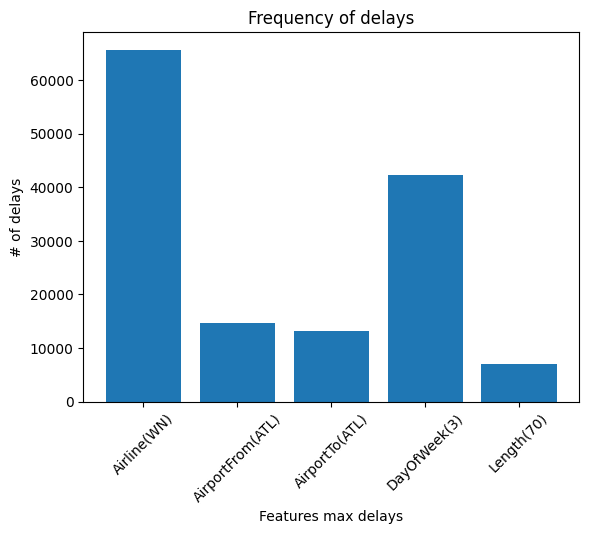

In [19]:
# Bar graph of max delays for the max # of delays of each feature: Joelia
fig,ax = plt.subplots() 

features = list(max_delays.keys())
frequency = list(max_delays.values())
ax.bar(features, frequency) 

new_labels = ['Airline(WN)', 'AirportFrom(ATL)', 'AirportTo(ATL)', 'DayOfWeek(3)', 'Length(70)']
plt.xticks(ticks=range(len(features)), labels=new_labels, rotation=45)
ax.set_title('Frequency of delays') 
ax.set_xlabel('Features max delays',) 
ax.set_ylabel('# of delays') 
plt.show()

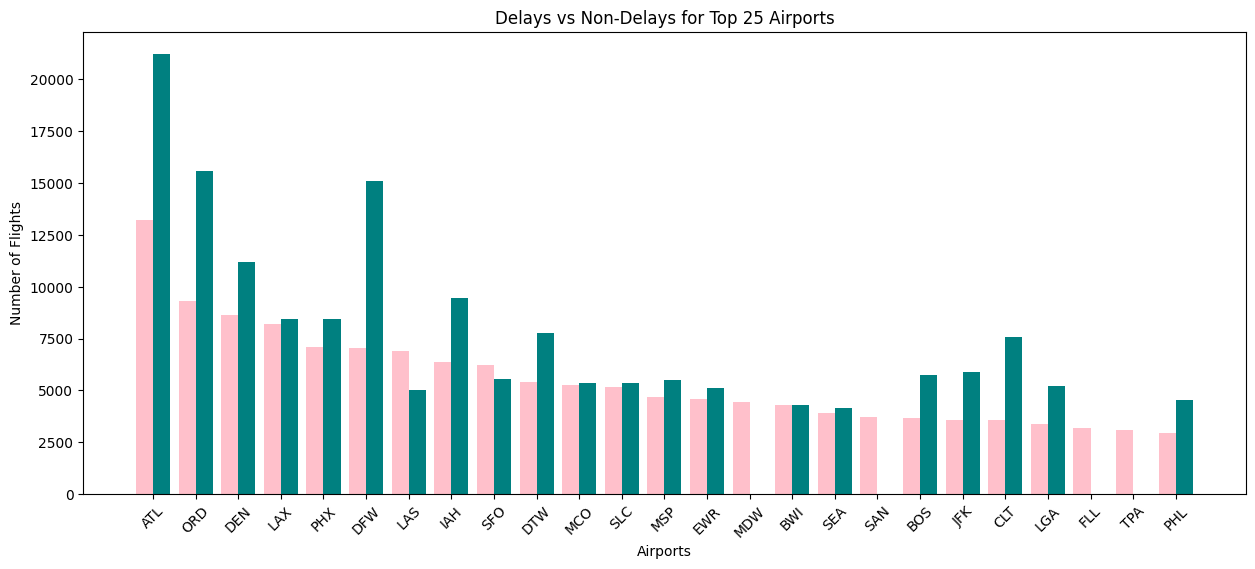

In [20]:
#Histogram of Delays vs Non Delays for top 25 Airports To and From : Nada

#Getting delay data
delayed = data[data['Delay'] == 1]
top50 = delayed['AirportTo'].value_counts().head(25)

#Getting ontime data
ontime = data[data['Delay'] == 0]
top50_ontime = ontime['AirportTo'].value_counts().head(25)
top50_on = top50_ontime.reindex(top50.index, fill_value=0).values  

fig, ax = plt.subplots(figsize=(15, 6))

#Set width of bars for spacing calculations
width = 0.4

#Evenly space the bars apart so they appear next to each other
ax.bar([x - width / 2 for x in range(len(top50.index))], top50, 0.4, color='pink')
ax.bar([x + width / 2 for x in range(len(top50.index))], top50_on, 0.4, color='teal')

#Formatting
ax.set_xlabel('Airports')
ax.set_ylabel('Number of Flights')
ax.set_title('Delays vs Non-Delays for Top 25 Airports')
ax.set_xticks(range(len(top50.index)))
ax.set_xticklabels(top50.index, rotation=45) 

plt.show()

# Models

### Logistic Regression : Mong

In [21]:
X = data[['Airline', 'DayOfWeek', 'Time', 'Length']]
y = data['Delay']

X = pd.get_dummies(X, columns=['Airline'], drop_first=True) #prevents multicolinearity 

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Scale data for better peformance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create, train, fit model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6338051669957452
Confusion Matrix:
 [[47160 12847]
 [26657 21213]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.79      0.70     60007
           1       0.62      0.44      0.52     47870

    accuracy                           0.63    107877
   macro avg       0.63      0.61      0.61    107877
weighted avg       0.63      0.63      0.62    107877



### Decision Tree: Nada

In [22]:
#Creating Decision Tree Object
clf = DecisionTreeClassifier()
#Fit data on model
clf.fit(X_train, y_train)

#Predict delay on test data
y_pred_tree = clf.predict(X_test)

# Print metrics
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67     60007
           1       0.57      0.48      0.52     47870

    accuracy                           0.61    107877
   macro avg       0.60      0.60      0.60    107877
weighted avg       0.61      0.61      0.61    107877



**Evaluation Metrics**

In [23]:
print("precision of delays: 0.57\nprecision of on-time: 0.63")
print("recall of delays: 0.48\nprecision of on-time: 0.71")
print("F1 of delays: 0.52\nF1 of on-time: 0.67")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

precision of delays: 0.57
precision of on-time: 0.63
recall of delays: 0.48
precision of on-time: 0.71
F1 of delays: 0.52
F1 of on-time: 0.67
Accuracy: 0.6107882125012746
Confusion Matrix:
 [[42728 17279]
 [24708 23162]]


### Knn Model: Vivian

In [24]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
label_encoder = LabelEncoder()
data["Airline"] = label_encoder.fit_transform(data["Airline"])
data["Flight"] = label_encoder.fit_transform(data["Flight"])
data["AirportFrom"] = label_encoder.fit_transform(data["AirportFrom"])
data["AirportTo"] = label_encoder.fit_transform(data["AirportTo"])

# Define features and target variable
X = data[
    ["id", 
     "Airline",
     "Flight", 
     "AirportFrom", 
     "AirportTo", 
     "DayOfWeek",
     "Time", 
     "Length"
    ]
]

y = data["Delay"]

print("Feature and target variables defined.")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

# Initialize the KNN model with knn=734
# KNN is 734 because it its the sq root of the total number of instances in the dataset 
knn_734 = KNeighborsClassifier(n_neighbors=734)
knn_734.fit(X_train, y_train)
print("KNN model trained.")

# Make predictions on the training and testing sets
y_train_pred_knn_734 = knn_734.predict(X_train)
y_test_pred_knn_734 = knn_734.predict(X_test)

# Evaluate the model on the training set
print("Training Set Results (kNN=734 -> 539383 rows of data^.5) ")
print(metrics.classification_report(y_train, y_train_pred_knn_734))
print("Confusion Matrix (Training):\n", metrics.confusion_matrix(y_train, y_train_pred_knn_734))

# Evaluate the model on the testing set
print("\nTesting Set Results (kNN=734 -> 539383 rows of data^.5)")
print(metrics.classification_report(y_test, y_test_pred_knn_734))
print("Confusion Matrix (Testing):\n", metrics.confusion_matrix(y_test, y_test_pred_knn_734))

Feature and target variables defined.
X shape: (539383, 8)
y shape: (539383,)
Data split into training and testing sets.
KNN model trained.
Training Set Results (kNN=734 -> 539383 rows of data^.5) 
              precision    recall  f1-score   support

           0       0.64      0.72      0.68    239240
           1       0.59      0.49      0.54    192266

    accuracy                           0.62    431506
   macro avg       0.61      0.61      0.61    431506
weighted avg       0.62      0.62      0.62    431506

Confusion Matrix (Training):
 [[172820  66420]
 [ 97470  94796]]

Testing Set Results (kNN=734 -> 539383 rows of data^.5)
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     59879
           1       0.59      0.49      0.54     47998

    accuracy                           0.62    107877
   macro avg       0.61      0.61      0.61    107877
weighted avg       0.62      0.62      0.61    107877

Confusion Matrix (Testing)

## Evaluation Metrics: Vivian

Accuracy

Precision 

Recall



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=734)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate Accuracy, Precision, and Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.6198
Precision: 0.5865
Recall: 0.4932


### Gaussian Naive Bayes Model: Joelia

In [26]:
# Create Gaussian model
gnb = GaussianNB()

# Fit model 
gnb.fit(X_train, y_train)

# Predict delays on model 
y_gnb_predict = gnb.predict(X_test)

# summarize the fit of the model
print("Accuracy:", accuracy_score(y_test, y_gnb_predict))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_gnb_predict))
print("Classification Report:\n", metrics.classification_report(y_test, y_gnb_predict))


Accuracy: 0.6033167403617082
Confusion Matrix:
 [[44786 15093]
 [27700 20298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.75      0.68     59879
           1       0.57      0.42      0.49     47998

    accuracy                           0.60    107877
   macro avg       0.60      0.59      0.58    107877
weighted avg       0.60      0.60      0.59    107877

